In [2]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

In [17]:
def make_coordinates(image,line_parameters):
        #unpack parameter the line y=mx+b is equal to (x1,y1),(x2,y2) 
        #slope=m,intercept=b
        slope,intercept=line_parameters
        #print(slope)
        #print(intercept)
        #y1 --> number of rows of pixels
        y1=image.shape[0]
        #y2---> 3/5 of  y1
        y2=int(y1*(3/5))
        #x1=(y1-b)/m
        x1=int((y1-intercept)/slope)
        x2=int((y2-intercept)/slope)
        coordinates_line=np.array([x1,y1,x2,y2])
        return coordinates_line

def averaged_slope_intercept(image,lines):
    left_fit=[]
    right_fit=[]
    for line in lines:
        #unpack point of lines 
        x1,y1,x2,y2=line.reshape(4)
        #create array with parameter of straight y=mx+b 
        parameters=np.polyfit((x1,x2),(y1,y2),1)
        #slope is --> m
        slope=parameters[0]
        #intercep is --> b
        intercept=parameters[1]
        #print(parameters)
        #print(slope)
        #print(intercept)
        if slope<0:
                left_fit.append((slope,intercept))
        else:
                right_fit.append((slope,intercept))
        #print(right_fit)
        #print(left_fit)
    #averanged left straight y=mx+b 
    left_fit_average=np.average(left_fit,axis=0)
    #averaged right straight y=mx+b 
    right_fit_average=np.average(right_fit,axis=0)
    print(left_fit_average,"left straight")    
    print(right_fit_average,"right strainght")    
    left_line=make_coordinates(image,left_fit_average)
    right_line=make_coordinates(image,right_fit_average)
    coordinates_two_lines=np.array([left_line,right_line])
    return coordinates_two_lines

def canny(image):
    gray=cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
    blur=cv2.GaussianBlur(gray,(5,5),0)
    canny=cv2.Canny(blur,50,150)
    return canny

def display_lines(image,lines):
    #create array with zero (black color) with the row x columns of image for a new image
    line_image=np.zeros_like(image)
    if lines is not None:
        for  x1,y1,x2,y2 in lines:
            #add  the line to the image line image
            cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)
    return line_image


def region_of_interest(image):
    height=image.shape[0]
    polygons=np.array([
        (200,height),(1100,height),(550,250)
    ])
    mask=np.zeros_like(image)
    cv2.fillPoly(mask,[polygons],255)
    masked_image=cv2.bitwise_and(image,mask)
    return masked_image

[  -1.61019355 1201.00387097] left straight
[   1.0243751  -298.80648538] right strainght


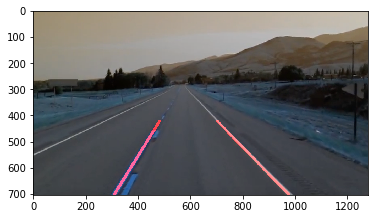

In [18]:
image=cv2.imread("test_image.jpg")
lane_image=np.copy(image)
canny_image=canny(lane_image)
cropped_image=region_of_interest(canny_image)
#apply probabilist hough transform
lines=cv2.HoughLinesP(cropped_image,2,np.pi/180,100,np.array([]),minLineLength=40,maxLineGap=5)
#coordinates of the average of lines
averaged_lines=averaged_slope_intercept(lane_image,lines)
#create a image with the line
line_image=display_lines(lane_image,averaged_lines)
#add lines and the image
combo_image=cv2.addWeighted(lane_image,0.8,line_image,1,1)
plt.imshow(combo_image)
plt.show()